In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
import pingouin as pg
import researchpy   
%matplotlib inline

In [3]:
df_train = pd.read_csv("Titanic_train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
data = df_train[["Sex", "Age", "Fare", "Survived"]]

In [35]:
data.info() # 需做補值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


### Q1. 透過數值法計算 Age 和 Survived 是否有相關性?

* Answer : 兩者相關性低

In [36]:
from sklearn import preprocessing
from sklearn.impute import KNNImputer

In [37]:
# 離散資料轉連續資料
le = preprocessing.LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])

# KNN補值
value_neighbors = 3
imputer = KNNImputer(n_neighbors = value_neighbors, add_indicator = True) 
data = pd.DataFrame(imputer.fit_transform(data), columns = ["Sex", "Age", "Fare", "Survived", "Imputed_Age"])

<ipython-input-37-07362604eb20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"] = le.fit_transform(data["Sex"])


In [59]:
import pingouin as pg

In [60]:
aov = pg.anova(dv = "Age", between = "Survived", data = data, detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived,2233.018897,1,2233.018897,11.724293,0.000645,0.013017
1,Within,169319.697304,889,190.460852,NaN,NaN,NaN


In [61]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq 

0.013016517290671402

In [62]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Small'

### Q2:透過數值法計算 Sex 和 Survived 是否有相關性?

* Answer : 兩者相關性高

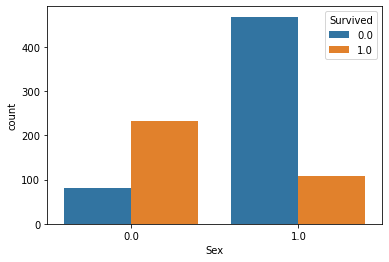

In [48]:
g = sns.countplot(x = "Sex", hue = "Survived", data = data) # male = 1, female = 0

In [47]:
crosstab, res = researchpy.crosstab(data["Sex"], data["Survived"], test = "chi-square")
print("Cramer's value is", res.loc[2, "results"]) # 年齡與存活與否高度相關

Cramer's value is 0.5434


In [57]:
crosstab.shape
df = min(crosstab.shape[0], crosstab.shape[1])

In [58]:
# 自動化判斷相關性

def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df, res.loc[2,'results'])

'large'

### Q3: 透過數值法計算 Age 和 Fare 是否有相關性?

* 兩者相關性低

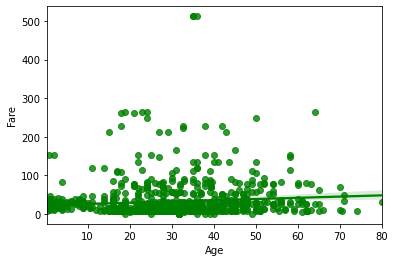

In [43]:
g = sns.regplot(x = "Age", y = "Fare", color = "g", data = data)

In [46]:
corr, _ = stats.pearsonr(data["Age"], data["Fare"])
corr # 無線性相關(未處理資料前)

0.08921375867230724